In [1]:
!pip install scikit-learn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import json
import statistics

In [4]:
denv_path = '../DENV/classify/predictions/'
hiv_path = '../HIV/classify/predictions/'

In [ ]:
denv = pd.read_csv(denv_path + 'metrics.csv')
hiv = pd.read_csv(hiv_path + 'metrics.csv')


In [15]:
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
for metric in metrics:
    print(f'DENV {metric}: {denv[metric].mean():.4f} ({denv[metric].std():.4f})')
print('-------------------')
for metric in metrics:
    print(f'HIV {metric}: {hiv[metric].mean():.4f} ({hiv[metric].std():.4f})')
print('-------------------')

DENV precision: 0.9945 (0.0029)
DENV recall: 0.9953 (0.0019)
DENV f1_score: 0.9949 (0.0019)
DENV accuracy: 0.9958 (0.0019)
-------------------
HIV precision: 0.8347 (0.0331)
HIV recall: 0.9776 (0.0095)
HIV f1_score: 0.8776 (0.0344)
HIV accuracy: 0.9901 (0.0022)
-------------------


In [16]:
def computeConfusionMatrix(tool, n):
    print("Compute confusion matrices for " + tool + "_" + str(n) + "...")

    matrices = {}
    df = pd.read_csv(tool + "/" + "predict_data_" + str(n) + ".csv")
    
    y_pred = df["Predicted"].str.split('_').str[0]
    y_true = df["ID"].str.split('_').str[0]

    confusion_matrix_matrix_pred = confusion_matrix(y_true, y_pred, normalize="pred")

    matrices["confusion_matrix_matrix_pred"] = confusion_matrix_matrix_pred.tolist()

    save_path = tool + "/confusion_matrix/" + tool.split('/')[1] + "_" + str(n) + "_confusion_matrix_matrix_pred.json"
    with open(save_path, "w") as outfile:
        json.dump(matrices["confusion_matrix_matrix_pred"], outfile)

In [18]:
# file_names = ["word9_RF", "word9_SVM", "word15_RF", "word15_SVM"]
file_names = [hiv_path, denv_path]
for file in file_names:
    for n in range(1,101):
        computeConfusionMatrix(file, n)


Compute confusion matrices for ../HIV/classify/predictions/_1...
Compute confusion matrices for ../HIV/classify/predictions/_2...
Compute confusion matrices for ../HIV/classify/predictions/_3...
Compute confusion matrices for ../HIV/classify/predictions/_4...
Compute confusion matrices for ../HIV/classify/predictions/_5...
Compute confusion matrices for ../HIV/classify/predictions/_6...
Compute confusion matrices for ../HIV/classify/predictions/_7...
Compute confusion matrices for ../HIV/classify/predictions/_8...
Compute confusion matrices for ../HIV/classify/predictions/_9...
Compute confusion matrices for ../HIV/classify/predictions/_10...
Compute confusion matrices for ../HIV/classify/predictions/_11...
Compute confusion matrices for ../HIV/classify/predictions/_12...
Compute confusion matrices for ../HIV/classify/predictions/_13...
Compute confusion matrices for ../HIV/classify/predictions/_14...
Compute confusion matrices for ../HIV/classify/predictions/_15...
Compute confusion m

In [21]:
hiv_metric = []
hiv_mean = []
hiv_standard_deviation = []

for n in range(1, 101): 
    with open(hiv_path + "/confusion_matrix/HIV_" + str(n) + "_confusion_matrix_matrix_pred.json") as data:
        hiv_metric.append(np.asarray(json.load(data)))

for i in range(0, 25):
    data = []
    for j in range(0, 25):
        data.append(hiv_metric[j].flatten()[i]) 
    hiv_mean.append(round(statistics.mean(data) * 100, 2))
    hiv_standard_deviation.append(round(statistics.stdev(data)*100, 2))
hiv_mean = np.asarray(hiv_mean).reshape(5,5)
hiv_standard_deviation = np.asarray(hiv_standard_deviation).reshape(5,5)

hiv_combined = [f"{i}\n± {j}" for i, j in zip(hiv_mean.flatten(), hiv_standard_deviation.flatten())]
hiv_combined = np.asarray(hiv_combined).reshape(5,5)

In [11]:
denv_metric = []
denv_mean = []
denv_standard_deviation = []

for n in range(1, 101): 
    with open(denv_path + "/confusion_matrix/DENV_" + str(n) + "_confusion_matrix_matrix_pred.json") as data:
        denv_metric.append(np.asarray(json.load(data)))

for i in range(0, 16):
    data = []
    for j in range(0, 16):
        data.append(denv_metric[j].flatten()[i]) 
    denv_mean.append(round(statistics.mean(data) * 100, 2))
    denv_standard_deviation.append(round(statistics.stdev(data)*100, 2))
denv_mean = np.asarray(denv_mean).reshape(4,4)
denv_standard_deviation = np.asarray(denv_standard_deviation).reshape(4,4)

denv_combined = [f"{i}\n± {j}" for i, j in zip(denv_mean.flatten(), denv_standard_deviation.flatten())]
denv_combined = np.asarray(denv_combined).reshape(4,4)

In [12]:
from math import sqrt
from operator import truediv
def get_metrics_from_conf_matrix(conf_mat):
    TP = np.diag(conf_mat)
    FP = conf_mat.sum(axis=0) - TP
    FN = conf_mat.sum(axis=1) - TP
    
    TN = conf_mat.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensibilidade, taxa de acerto, recall ou taxa de true positive 
    TPR = list(map(truediv,TP,(TP+FN)))
    m_TPR = np.mean(TPR)
    print("Sensibilidade Recall:\t", m_TPR)
    
    # Especificidade ou taxa de true negative
    TNR = TN/(TN+FP) 
    m_TNR = np.mean(TNR)
    print("True Negative:\t", m_TNR)
    
    # Precisao
    PPV = list(map(truediv,TP,(TP+FP)))
    m_PPV = np.mean(PPV)
    print("Precisão:\t", m_PPV)
    
    # Predicao negativa
    NPV = TN/(TN+FN)
    m_NPV = np.mean(NPV)
    print("Pred. Negativa:\t", m_NPV)
    # False positive
    FPR = FP/(FP+TN)
    m_FPR = np.mean(FPR)
    print("False Positive: ", m_FPR)
    # False negative
    FNR = FN/(TP+FN)
    m_FNR = np.mean(FNR)
    print("False Negative:\t", m_FNR)
    # False discovery
    FDR = FP/(TP+FP)
    m_FDR = np.mean(FDR)
    print("F Discovery:\t", m_FDR)
    # Accuracy for each class
    ACC = list(map(truediv,(TP+TN),(TP+FP+FN+TN)))
    m_ACC = np.mean(ACC)
    print("Acurácia:\t", m_ACC)

    x = (m_TPR + m_FPR) * (m_TPR + m_FNR) * (m_TNR + m_FPR) * (m_TNR + m_FNR)
    mcc = ((m_TPR * m_TNR) - (m_FPR * m_FNR)) / sqrt(x)

    f1 = 2 * ((m_PPV * m_TPR) / (m_PPV + m_TPR))
    print("F1:\t", f1)
    print("MCC:\t", mcc)
    return m_ACC, f1, m_TPR, m_PPV, mcc


[Text(0, 0.5, 'Type 1'),
 Text(0, 1.5, 'Type 2'),
 Text(0, 2.5, 'Type 3'),
 Text(0, 3.5, 'Type 4')]

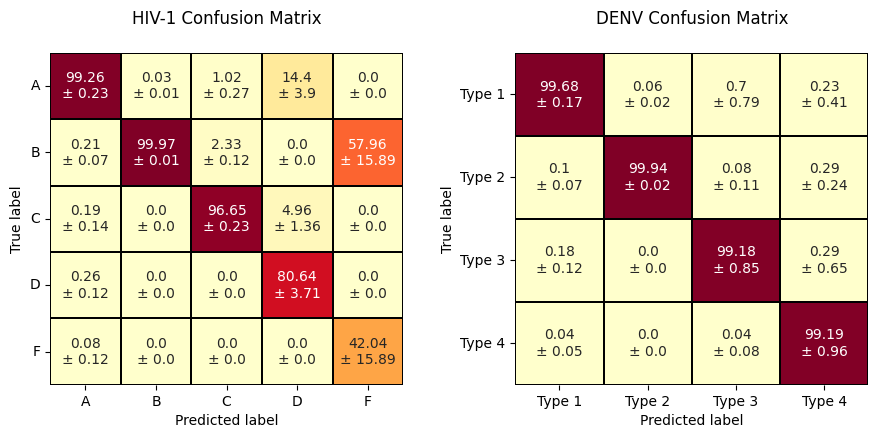

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=5.0)

classes_hiv = ["A", "B", "C", "D", "F"]
classes_denv = ['Type 1', 'Type 2', 'Type 3', 'Type 4']

sns.heatmap(ax=axes[0],
            data=hiv_mean,
            annot=hiv_combined,
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)
sns.heatmap(ax=axes[1],
            data=denv_mean,
            annot=denv_combined, 
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)

# Titles
axes[0].set_title("HIV-1 Confusion Matrix\n")
axes[1].set_title("DENV Confusion Matrix\n")

# X ticks labels
axes[0].set_xticklabels(["A", "B", "C", "D", "F"])
axes[1].set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'])

# X and Y Labels
axes[0].set_ylabel("True label")
axes[0].set_xlabel("Predicted label")
axes[1].set_ylabel("True label")
axes[1].set_xlabel("Predicted label")

# Y ticks labels
axes[0].yaxis.set_ticklabels(["A", "B", "C", "D", "F"], rotation=0)
axes[1].yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'], rotation=0)


[Text(0, 0.5, 'Type 1'),
 Text(0, 1.5, 'Type 2'),
 Text(0, 2.5, 'Type 3'),
 Text(0, 3.5, 'Type 4')]

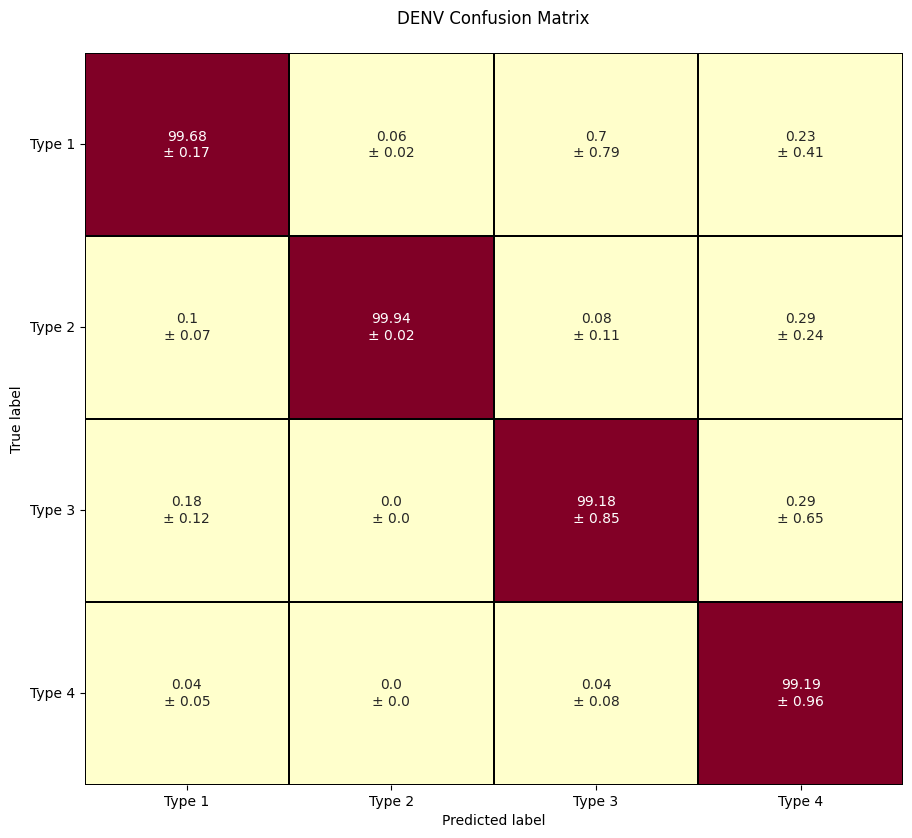

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(10,9))
fig.tight_layout(pad=5.0)

classes_denv = ['Type 1', 'Type 2', 'Type 3', 'Type 4']


sns.heatmap(ax=axes,
            data=denv_mean,
            annot=denv_combined, 
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)

# Titles
axes.set_title("DENV Confusion Matrix\n")

# X ticks labels
axes.set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'])

# X and Y Labels
axes.set_ylabel("True label")
axes.set_xlabel("Predicted label")

# Y ticks labels
axes.yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'], rotation=0)


(0.4, 1.0)

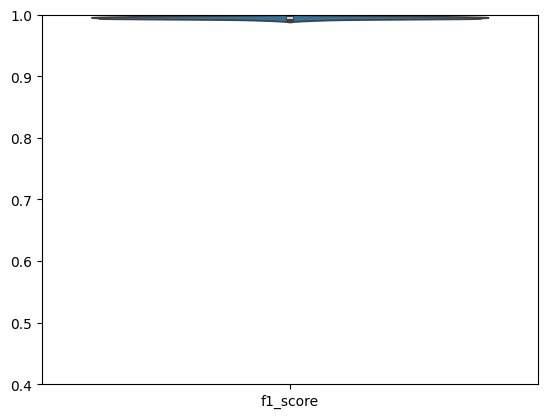

In [ ]:

metrics = ['precision', 'recall', 'f1_score', 'accuracy']
ax = sns.violinplot(data=[denv['f1_score']])
ax.set_ylim([0.4,1])


<Axes: >

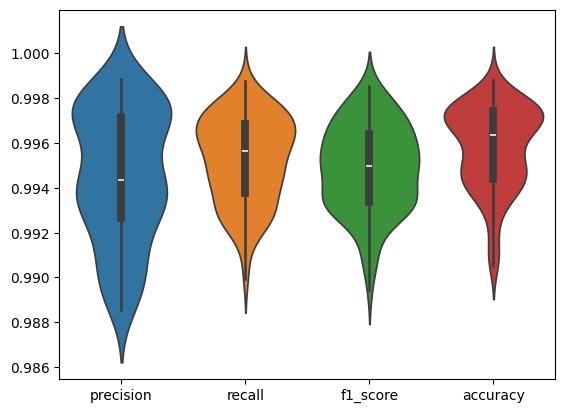

In [9]:
sns.violinplot(denv[metrics])

/tmp/ipykernel_12033/2006939136.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Precision', 'Recall', 'F1-Score', 'Accuracy'])


[Text(0, 0.5, 'Type 1'),
 Text(0, 1.5, 'Type 2'),
 Text(0, 2.5, 'Type 3'),
 Text(0, 3.5, 'Type 4')]

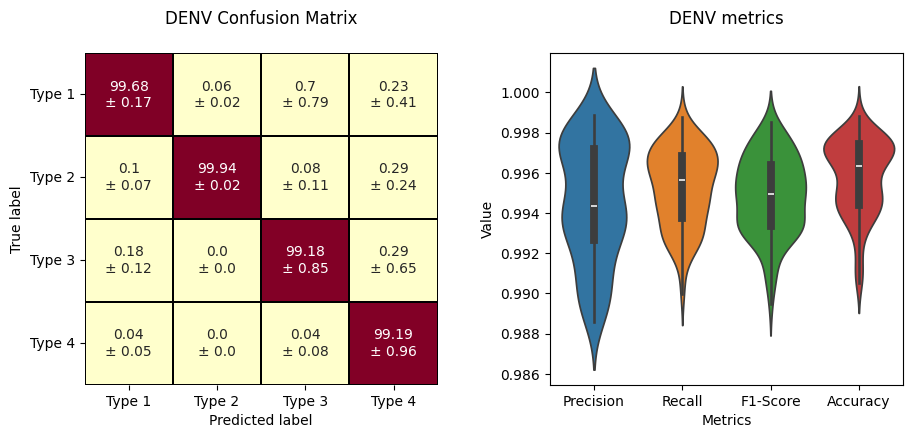

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=5.0)

classes_denv = ['Type 1', 'Type 2', 'Type 3', 'Type 4']


sns.heatmap(ax=axes[0],
            data=denv_mean,
            annot=denv_combined, 
            fmt="",
            cmap='YlOrRd',
            linecolor="black",
            linewidths=.1,
            cbar=False)

sns.violinplot(ax=axes[1],
               data=denv[metrics])

# Titles
axes[0].set_title("DENV Confusion Matrix\n")
axes[1].set_title("DENV metrics\n")

# X ticks labels
axes[0].set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'])
axes[1].set_xticklabels(['Precision', 'Recall', 'F1-Score', 'Accuracy'])

# X and Y Labels
axes[0].set_ylabel("True label")
axes[0].set_xlabel("Predicted label")
axes[1].set_ylabel("Value")
axes[1].set_xlabel("Metrics")

# Y ticks labels
axes[0].yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'], rotation=0)
